# Exercise: NEISS, Question Set R

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Using codebooks
- Reading tab-separated files
- Ignoring bad lines
- Replacing LOTS of values
- Merging dataframes
- Using numpy/`np.nan`
- Padding strings
- String search using regular expressions

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd
%matplotlib inline
df = pd.read_csv("nss15.tsv", sep="\t", error_bad_lines=False)


b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


In [2]:
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


### Check that your dataframe has 357727 rows and 19 columns.

In [3]:
df.shape

(357727, 19)

### List the columns and their data types

In [4]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [5]:
# Weight is a weighting system, to account for the hostpital
# Age, if someone is under two years old, values will be shown as above 200 and then are conted by weeks old. Or else the normal age will be shown.
# Sex, Male is represented as 1 while female is represented as 2.

# Cleaning up a column

Take a look at the **body part** column. How many rows of each body part are there?

In [6]:
df["body_part"].value_counts()

75    58677
76    30992
79    30579
92    30463
37    20077
31    19518
35    18957
82    17077
83    15890
30    14822
33    13655
36    12771
34    11565
32     8888
85     8615
88     7336
93     7299
89     6145
77     4661
94     4404
81     4174
80     4016
0      3344
87     2079
38     1699
84       24
Name: body_part, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to pages 11-12 of the column definitions file, or... hey, I typed it in below!

- Tip: If I've already talked about how to replace values, maybe there's a really easy way to replace a lot at once? Maybe I'll tell you if you ask me?

In [7]:
replacements = {0:  'internal',
    30: 'shoulder',
    31: 'upper trunk',
    32: 'elbow',
    33: 'lower arm',
    34: 'wrist',
    35: 'knee',
    36: 'lower leg',
    37: 'ankle',
    38: 'pubic region',
    75: 'head',
    76: 'face',
    77: 'eyeball',
    79: 'lower trunk',
    80: 'upper arm',
    81: 'upper leg',
    82: 'hand',
    83: 'foot',
    84: '25-50% of body',
    85: 'all parts of body',
    87: 'not recorded',
    88: 'mouth',
    89: 'neck',
    92: 'finger',
    93: 'toe',
    94: 'ear'
               }

In [8]:
df.body_part.replace(replacements, inplace = True)
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,wrist,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,knee,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,head,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Confirm you have 58677 head, 30992 face, and 30579 lower trunk.

Isn't this much nicer?

In [9]:
df["body_part"].value_counts()

head                 58677
face                 30992
lower trunk          30579
finger               30463
ankle                20077
upper trunk          19518
knee                 18957
hand                 17077
foot                 15890
shoulder             14822
lower arm            13655
lower leg            12771
wrist                11565
elbow                 8888
all parts of body     8615
mouth                 7336
toe                   7299
neck                  6145
eyeball               4661
ear                   4404
upper leg             4174
upper arm             4016
internal              3344
not recorded          2079
pubic region          1699
25-50% of body          24
Name: body_part, dtype: int64

## Graph the number of each body part, but don’t included the “Not Recorded” records

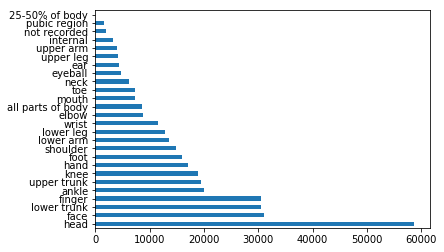

In [10]:
df["body_part"].value_counts().plot(kind = "barh")

## "Not Recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [11]:
import numpy as np
df['body_part'].replace("not recorded", "NaN", inplace=True)
df['body_part'].replace("NaN", np.nan, inplace=True)


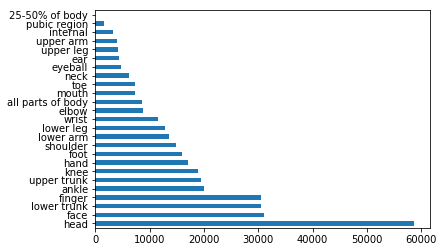

In [12]:
df["body_part"].value_counts().plot(kind = "barh")

## Graph the count of each body part, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

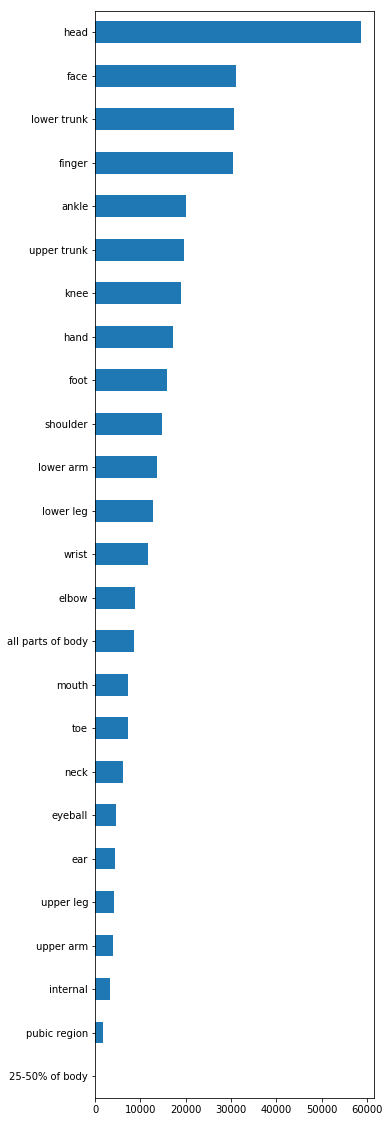

In [13]:
df.body_part.value_counts().plot(kind = "barh", figsize=(5,20)).invert_yaxis()




## For each body part, get the average age of the person who injured that part

Sort from youngest to oldest

In [14]:
df.groupby("body_part")["age"].mean().sort_values()

body_part
pubic region         19.985874
ear                  24.248183
ankle                28.477512
wrist                30.697968
lower arm            32.357598
foot                 32.578666
knee                 34.106451
toe                  34.988766
hand                 35.811208
finger               35.978170
elbow                36.592934
eyeball              36.669599
neck                 38.354109
shoulder             39.266901
lower leg            44.255814
25-50% of body       44.333333
upper leg            45.934835
upper trunk          46.587663
upper arm            46.655129
face                 47.749193
lower trunk          49.667844
mouth                51.241957
head                 59.512637
internal             62.912978
all parts of body    63.406268
Name: age, dtype: float64

## Wait, "not recorded" seems really really really really old!

How can the average age be like 80???? Read page 6 of the documentation. Fix the issue however you think is best, but explain what you're doing. **It would be nice to talk about this in class if you'd write it on the board!**

### Tech tip you might find useful

If you want to replace a column based on a condition, pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [15]:
df.loc[df.age >= 200, "age"] = 1
df.groupby("body_part")["age"].mean().sort_values()

body_part
internal              7.003888
mouth                12.184978
ear                  16.369891
pubic region         17.444379
face                 22.550368
elbow                24.099122
lower arm            25.143171
all parts of body    26.533720
ankle                27.605569
eyeball              28.138168
finger               28.792141
foot                 28.895406
wrist                29.298919
toe                  29.787642
hand                 29.839199
head                 31.228659
lower leg            33.302326
knee                 33.470961
neck                 36.473230
shoulder             36.907300
upper leg            37.790369
upper arm            40.624004
25-50% of body       44.333333
upper trunk          44.351317
lower trunk          48.751398
Name: age, dtype: float64

# Finding injuries

## How many people were injured by "Musical instruments, electric or battery operated?"

Try to do what you think would work, then see... it doesn't work. There are all kinds of reasons why it wouldn't work. Keep reading once it doesn't work for you.

- Tip: `prod1` and `prod2` are the product fields
- Tip: You can use the codebook or `cleaned-categories.txt`

In [16]:
df.head()
df.prod1 = df.prod1.astype(str).str.pad(4, fillchar='0')

In [17]:
df.head()


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,wrist,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,knee,1,0,0,0611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,head,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


### Did something go wrong when you read in your data?

Maybe it's one of those problems like we had with `008382` in the homework, where when we read in the file it got rid of the leading zeroes? Try to read the file in again and fix that.

Try to get all of the "Musical instruments, electric or battery operated" injurie again. It still won't work. Keep reading.

In [18]:
df.prod2 = df.prod2.astype(str).str.pad(4, fillchar='0')
df.head()


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,lower arm,1,9,0,1267,0nan,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,wrist,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,0nan,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,knee,1,0,0,0611,0nan,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,head,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [19]:
df['prod2'].replace("0nan", "0", inplace=True)
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,lower arm,1,9,0,1267,0,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,wrist,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,0,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,knee,1,0,0,0611,0,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,head,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


### Looks the data export is bad!

They turned `0565` into `565` when they exported it or something (so irresponsible!), and it's up to us to fix it. Pad the `prod1` and `prod2` columns to be the proper length. If you didn't actually do the task above it's going to be more difficult.

## How many people were injured by musical instruments, total?

Include normal musical instruments, electric musical instruments and toy musical instruments.

- Tip: You can use the codebook or `cleaned-categories.txt`
- Tip: Answer this in one line **without** using `and` or `&`.

In [20]:
#0565, 0566, 1344

df.head()
inst = df[df["prod1"].isin(["0565", "0566","1344"])]
inst["prod1"].value_counts().sum()

226

## Out of those three, which is the most popular reason for admission?

In [21]:
inst["prod1"].value_counts()

0566    188
1344     24
0565     14
Name: prod1, dtype: int64

## What parts of the body are injured by musical instruments most often?

In [22]:
inst.groupby("prod1")["body_part"].value_counts()

prod1  body_part        
0565   finger                3
       face                  2
       shoulder              2
       all parts of body     1
       ankle                 1
       foot                  1
       lower arm             1
       toe                   1
       upper trunk           1
       wrist                 1
0566   head                 28
       face                 23
       finger               20
       upper trunk          18
       lower trunk          15
       mouth                11
       shoulder             11
       wrist                11
       foot                  6
       knee                  6
       toe                   6
       all parts of body     5
       eyeball               5
       lower arm             5
       elbow                 4
       hand                  4
       neck                  4
       lower leg             3
       ankle                 1
       ear                   1
       upper arm             1
1344   face   

# Adding categories

## Read in `categories-cleaned.txt`

In [1]:
categories_cleaned = pd.read_csv('categories-cleaned.txt', names = ["code", "categories"], sep=",", header = None)


NameError: name 'pd' is not defined

In [35]:
categories_cleaned.code = categories_cleaned.code.astype(str)
categories_cleaned.dtypes

code          object
categories    object
dtype: object

## How many different categories are electric/electrical/electronic?

In [51]:
categories_cleaned.categories.str.extract("(Electr)").value_counts()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Electr    39
Name: categories, dtype: int64

## Join this with your injuries dataframes to give every row a text product code

In [36]:
df_merged = df.merge(categories_cleaned, left_on = "prod1", right_on = "code")
df_merged.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,code,categories
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,...,lower arm,1,9,0,1267,0,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,1267,"Soccer (activity, apparel or equipment)"
1,150821622,07/20/2015,43,83.2157,S,20,2,1,NaN,57,...,lower leg,1,9,0,1267,0,L DISTAL FIB FX/20YOWF WHILE PLAYING SOCCER AT...,LE CAUSING INJURY TO DISTAL FIB.,1267,"Soccer (activity, apparel or equipment)"
2,150948626,09/08/2015,37,5.6748,C,10,2,0,NaN,57,...,lower arm,1,0,0,1267,0,10 YO F TRIPPED FORWARD WHEN PLAYING SOCCER FX...,NaN,1267,"Soccer (activity, apparel or equipment)"
3,151029422,10/06/2015,24,97.9239,M,37,1,1,NaN,64,...,knee,1,0,0,1267,0,J/ 37 YOM. LT KNEE PAIN AFTER HE KICKED THE BA...,DXL KNEE SPRAIN,1267,"Soccer (activity, apparel or equipment)"
4,151029234,10/10/2015,21,16.5650,V,13,2,0,NaN,62,...,head,1,9,0,1267,0,13YF H/A&VOMITINGX4 S/P GOT STRUCK TO HEAD C T...,>>CHI,1267,"Soccer (activity, apparel or equipment)"


## How many different injuries involved an electric/electrical/electronic product?

In [59]:
#df_merged["categories"].value_counts()
df_merged["electric"] = df_merged.categories.str.contains("(Electr)")
df_merged.head()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,disposition,location,fmv,prod1,prod2,narr1,narr2,code,categories,electric
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,...,1,9,0,1267,0,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,1267,"Soccer (activity, apparel or equipment)",False
1,150821622,07/20/2015,43,83.2157,S,20,2,1,NaN,57,...,1,9,0,1267,0,L DISTAL FIB FX/20YOWF WHILE PLAYING SOCCER AT...,LE CAUSING INJURY TO DISTAL FIB.,1267,"Soccer (activity, apparel or equipment)",False
2,150948626,09/08/2015,37,5.6748,C,10,2,0,NaN,57,...,1,0,0,1267,0,10 YO F TRIPPED FORWARD WHEN PLAYING SOCCER FX...,NaN,1267,"Soccer (activity, apparel or equipment)",False
3,151029422,10/06/2015,24,97.9239,M,37,1,1,NaN,64,...,1,0,0,1267,0,J/ 37 YOM. LT KNEE PAIN AFTER HE KICKED THE BA...,DXL KNEE SPRAIN,1267,"Soccer (activity, apparel or equipment)",False
4,151029234,10/10/2015,21,16.5650,V,13,2,0,NaN,62,...,1,9,0,1267,0,13YF H/A&VOMITINGX4 S/P GOT STRUCK TO HEAD C T...,>>CHI,1267,"Soccer (activity, apparel or equipment)",False


In [62]:
df_merged["electric"].value_counts()

False    294136
True        323
Name: electric, dtype: int64

In [76]:
df_merged.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part       object
disposition      int64
location         int64
fmv              int64
prod1           object
prod2           object
narr1           object
narr2           object
code            object
categories      object
electric          bool
dtype: object

## Graph the most common injuries involving an electrical product

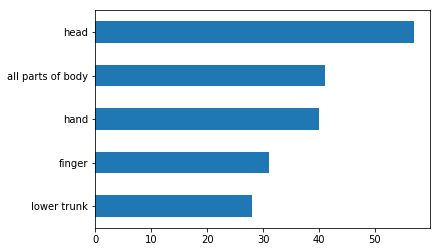

In [98]:

electric = df_merged[df_merged["electric"]]
electric["body_part"].value_counts().head().plot(kind = "barh").invert_yaxis()


## When people get injuries using an electrical product, what part of their body is injured?

In [96]:
electric["body_part"].value_counts()

head                 57
all parts of body    41
hand                 40
finger               31
lower trunk          28
face                 17
foot                 17
shoulder             15
upper trunk          13
eyeball              12
lower leg             9
knee                  7
wrist                 7
lower arm             6
neck                  5
internal              4
toe                   3
ankle                 2
ear                   2
mouth                 2
elbow                 2
pubic region          1
upper leg             1
upper arm             1
Name: body_part, dtype: int64

In [84]:
#df_merged["electric"] = df_merged.categories.str.contains("(Electr)")

df_merged["mouth"] = df_merged["body_part"].str.contains("(mouth)")
df_merged.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,location,fmv,prod1,prod2,narr1,narr2,code,categories,electric,mouth
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,...,9,0,1267,0,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,1267,"Soccer (activity, apparel or equipment)",False,False
1,150821622,07/20/2015,43,83.2157,S,20,2,1,NaN,57,...,9,0,1267,0,L DISTAL FIB FX/20YOWF WHILE PLAYING SOCCER AT...,LE CAUSING INJURY TO DISTAL FIB.,1267,"Soccer (activity, apparel or equipment)",False,False
2,150948626,09/08/2015,37,5.6748,C,10,2,0,NaN,57,...,0,0,1267,0,10 YO F TRIPPED FORWARD WHEN PLAYING SOCCER FX...,NaN,1267,"Soccer (activity, apparel or equipment)",False,False
3,151029422,10/06/2015,24,97.9239,M,37,1,1,NaN,64,...,0,0,1267,0,J/ 37 YOM. LT KNEE PAIN AFTER HE KICKED THE BA...,DXL KNEE SPRAIN,1267,"Soccer (activity, apparel or equipment)",False,False
4,151029234,10/10/2015,21,16.5650,V,13,2,0,NaN,62,...,9,0,1267,0,13YF H/A&VOMITINGX4 S/P GOT STRUCK TO HEAD C T...,>>CHI,1267,"Soccer (activity, apparel or equipment)",False,False


In [88]:
mouth = df_merged[df_merged["mouth"] == True]
mouth.head()
mouth["categories"].value_counts()

Floors or flooring materials                                                                                                               655
Beds or bedframes, other or not specified                                                                                                  469
Tables, not elsewhere classified (excl. baby changing tables, billiard or pool tables and television tables or stands)                     461
Stairs or steps (excluding pull-down and folding stairs)                                                                                   454
Bicycles or accessories (excluding mountain or all-terrain bicycles)                                                                       353
Basketball (activity, apparel or equipment)                                                                                                346
Chairs, other or not specified                                                                                                             326

## What product is most likely to injure your ears?

In [93]:
df_merged["ears"] = df_merged["body_part"].str.contains("(ear)")
df_merged.head()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,fmv,prod1,prod2,narr1,narr2,code,categories,electric,mouth,ears
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,...,0,1267,0,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,1267,"Soccer (activity, apparel or equipment)",False,False,False
1,150821622,07/20/2015,43,83.2157,S,20,2,1,NaN,57,...,0,1267,0,L DISTAL FIB FX/20YOWF WHILE PLAYING SOCCER AT...,LE CAUSING INJURY TO DISTAL FIB.,1267,"Soccer (activity, apparel or equipment)",False,False,False
2,150948626,09/08/2015,37,5.6748,C,10,2,0,NaN,57,...,0,1267,0,10 YO F TRIPPED FORWARD WHEN PLAYING SOCCER FX...,NaN,1267,"Soccer (activity, apparel or equipment)",False,False,False
3,151029422,10/06/2015,24,97.9239,M,37,1,1,NaN,64,...,0,1267,0,J/ 37 YOM. LT KNEE PAIN AFTER HE KICKED THE BA...,DXL KNEE SPRAIN,1267,"Soccer (activity, apparel or equipment)",False,False,False
4,151029234,10/10/2015,21,16.5650,V,13,2,0,NaN,62,...,0,1267,0,13YF H/A&VOMITINGX4 S/P GOT STRUCK TO HEAD C T...,>>CHI,1267,"Soccer (activity, apparel or equipment)",False,False,False


In [94]:
ears = df_merged[df_merged["ears"] == True]
ears.head()
ears["categories"].value_counts()

Jewelry (excluding watches)                                                                                               1209
Swimming (activity, apparel or equipment; excluding flotation devices)                                                    1003
Paper products (excluding bags, cups, straws and cardboard products)                                                       159
Tables, not elsewhere classified (excl. baby changing tables, billiard or pool tables and television tables or stands)     128
Beds or bedframes, other or not specified                                                                                   99
Pens and pencils                                                                                                            91
Swimming pools, not specified                                                                                               72
Desk supplies (excluding pens and pencils)                                                                     